In [71]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

In [72]:
from data_load import load_data_from_postgres, load_data_using_sqlalchemy
from sql_queries import execute_telecom_queries

In [73]:
# define sql query
query = 'SELECT * FROM xdr_data;'

# load data using sqlalchemy
df = load_data_using_sqlalchemy(query)

# display the first few rows of the data
if df is None:
    print('No data loaded')
else:
    print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [75]:
print(df.describe())

          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739   

In [76]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

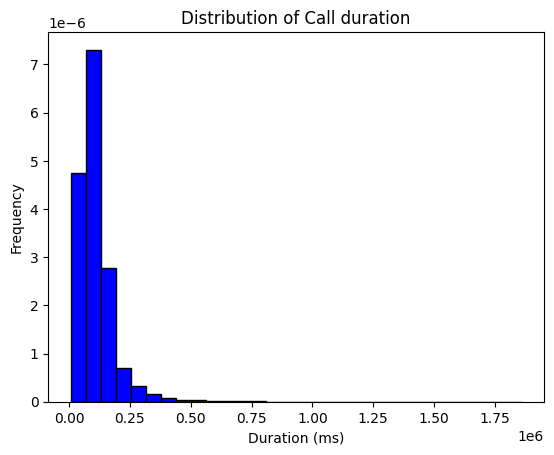

In [77]:
from visualizer import plot_histogram

# plot histogram
#plot_histogram(data, column, bins, title, xlabel, ylabel, color)
plot_histogram(df, 'Dur. (ms)', 30,'Distribution of Call duration', 'Duration (ms)', 'Frequency', 'blue',kde=True)

In [78]:
# average duration by last location name
avg_duration_by_location = df.groupby('Last Location Name')['Dur. (ms)'].mean().reset_index()
print(avg_duration_by_location.sort_values('Dur. (ms)', ascending=False))

         Last Location Name  Dur. (ms)
33951               T53539A  1177517.0
1342   CELL_208_20_520166_7  1134225.0
6056                D20985B  1038128.0
17025               D94074C  1010097.0
37089               T76656C   985972.0
...                     ...        ...
20518               G92776B     7327.0
18917               G52206C     7326.0
20510               G92604C     7267.0
18612               G30104B     7258.0
18635               G30532C     7146.0

[45547 rows x 2 columns]


Top 10 Handsets

In [79]:
# Group by handset type and count occurrences
top_handsets = df.groupby('Handset Type')['Handset Type'].count().sort_values(ascending=False).head(10)

# Display the result
print("Top 10 Handsets:")
print(top_handsets)


Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


Top 3 Handset Manufacturers

In [80]:
# Group by manufacturer and count occurrences
top_manufacturers = df.groupby('Handset Manufacturer')['Handset Manufacturer'].count().sort_values(ascending=False).head(3)

# Display the result
print("Top 3 Manufacturers:")
print(top_manufacturers)


Top 3 Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64


Top 5 Handsets per Top 3 Manufacturers

In [81]:
# Filter the data to include only top 3 manufacturers
top_manufacturers_list = top_manufacturers.index.tolist()
filtered_data = df[df['Handset Manufacturer'].isin(top_manufacturers_list)]

# Get top 5 handsets per manufacturer
top_5_handsets_per_manufacturer = filtered_data.groupby(['Handset Manufacturer', 'Handset Type'])['Handset Type']\
    .count().sort_values(ascending=False).groupby('Handset Manufacturer').head(5)

# Display the result
print("Top 5 Handsets per Top 3 Manufacturers:")
print(top_5_handsets_per_manufacturer)


Top 5 Handsets per Top 3 Manufacturers:
Handset Manufacturer  Handset Type                  
Huawei                Huawei B528S-23A                  19752
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Huawei                Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018   

## Interpretation and Recommendations

---

### Interpretation:
1. **Top 10 Handsets**:
   - The Huawei B528S-23A is the most used handset with 19,752 users, indicating its popularity.
   - Apple dominates the top 10 list, with 7 out of 10 spots.
   - Samsung Galaxy S8 (Sm-G950F) is the only Samsung handset in the top 10, showcasing its user base.

2. **Top 3 Manufacturers**:
   - Apple leads with a total of 59,565 handsets, significantly outpacing Samsung and Huawei.
   - Samsung and Huawei are also strong players, with 40,839 and 34,423 handsets, respectively.

3. **Top 5 Handsets per Top 3 Manufacturers**:
   - Apple:
     - iPhone 6S (A1688), iPhone 6 (A1586), and iPhone 7 (A1778) dominate the list, reflecting sustained demand for slightly older models.
   - Samsung:
     - The Galaxy S8 is the most popular Samsung device, followed by a mix of mid-range (Galaxy A5) and entry-level (Galaxy J5, J3) devices.
   - Huawei:
     - The B528S-23A dominates, with the P20 Lite and P20 indicating interest in premium models.

---

### Recommendations for Marketing Teams:
1. **Focus on Popular Models**:
   - Invest in targeted promotions for the top handsets (e.g., Huawei B528S-23A, Apple iPhone 6S, and Samsung Galaxy S8).
   - Highlight the affordability and features of mid-range models to attract more users.

2. **Partnership Opportunities**:
   - Partner with Apple to offer exclusive deals on older but popular models like the iPhone 6 and 6S to appeal to budget-conscious users.
   - Collaborate with Huawei to promote flagship models like the P20 series.

3. **Customer Retention**:
   - Use handset insights to create retention campaigns, offering incentives for users to upgrade within the same manufacturer brand (e.g., iPhone SE users upgrading to iPhone Xr).

4. **Data-Driven Strategy**:
   - Regularly analyze handset usage trends to adjust marketing efforts dynamically.

---

Aggregate User Behavior Data

In [82]:
from user_behavior import aggregate_user_data, process_application_totals

# Standardize column names to lowercase
df.columns = df.columns.str.strip().str.lower()

applications = ['social media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']

user_aggregates = aggregate_user_data(df)
user_behavior_overview = process_application_totals(user_aggregates, applications)

# Display the result
print("User Behavior Overview:")
print(user_behavior_overview.head())

User Behavior Overview:
               Number of Sessions  Total Session Duration (ms)  \
msisdn/number                                                    
3.360100e+10                    1                     116720.0   
3.360100e+10                    1                     181230.0   
3.360100e+10                    1                     134969.0   
3.360101e+10                    1                      49878.0   
3.360101e+10                    2                      37104.0   

               Total Download Data (Bytes)  Total Upload Data (Bytes)  \
msisdn/number                                                           
3.360100e+10                  8.426375e+08                 36053108.0   
3.360100e+10                  1.207552e+08                 36104459.0   
3.360100e+10                  5.566597e+08                 39306820.0   
3.360101e+10                  4.019932e+08                 20327526.0   
3.360101e+10                  1.363130e+09                 94280527.0   

 

Exploratory Data Analysis (EDA)

In [83]:
from data_cleaning import missing_value_report

report = missing_value_report(df)
print("Missing Value Report:")
print(report)

Missing Value Report:
                                      Column  Missing Values  Percentage
0             nb of sec with 37500b < vol ul          130254   86.835421
1     nb of sec with 6250b < vol ul < 37500b          111843   74.561503
2            nb of sec with 125000b < vol dl           97538   65.024900
3                tcp ul retrans. vol (bytes)           96649   64.432237
4   nb of sec with 31250b < vol dl < 125000b           93586   62.390251
5      nb of sec with 1250b < vol ul < 6250b           92894   61.928920
6     nb of sec with 6250b < vol dl < 31250b           88317   58.877607
7                tcp dl retrans. vol (bytes)           88146   58.763608
8                            http ul (bytes)           81810   54.539636
9                            http dl (bytes)           81474   54.315638
10                           avg rtt dl (ms)           27829   18.552543
11                           avg rtt ul (ms)           27812   18.541210
12                        las

In [84]:
columns_to_drop = report[report['Percentage'] > 70]['Column']

# Drop high missing value columns
df = df.drop(columns=columns_to_drop, axis=1)

In [85]:
from data_cleaning import impute_missing_values


# Pre-Imputation for Moderate Missing Value Columns
columns_to_impute = ['http dl (bytes)', 'http ul (bytes)']
for column in columns_to_impute:
    if column in df.columns:
        df = impute_missing_values(df, 'handset type', column)

In [86]:
from data_cleaning import clean_data

critical_columns = ['bearer id', 'msisdn/number', 'start', 'end']

# Call the clean_data function
df_cleaned = clean_data(df, critical_columns)

Starting data cleaning...
Missing value handling completed.
Outlier treatment completed.
Data cleaning finished.


In [87]:
print("Cleaned Data Info:")
print(df_cleaned.info())

# Generate a new missing value report to ensure all critical columns are cleaned
new_report = missing_value_report(df_cleaned)
print("Post-Cleaning Missing Value Report:")
print(new_report)

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 148506 entries, 0 to 149999
Data columns (total 53 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer id                                 148506 non-null  float64
 1   start                                     148506 non-null  object 
 2   start ms                                  148506 non-null  float64
 3   end                                       148506 non-null  object 
 4   end ms                                    148506 non-null  float64
 5   dur. (ms)                                 148506 non-null  float64
 6   imsi                                      148506 non-null  float64
 7   msisdn/number                             148506 non-null  float64
 8   imei                                      148506 non-null  float64
 9   last location name                        148506 non-null  object 
 10  avg rt

In [88]:
# Descriptive statistics
summary = df.describe()
print("Summary Statistics:")
print(summary)


Summary Statistics:
          bearer id       start ms         end ms     dur. (ms)          imsi  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       msisdn/number          imei  avg rtt dl (ms)  avg rtt ul (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13

In [89]:
from data_explore import describe_variables, save_to_csv

# Describe variables and data types

# Describe variables and data types
variable_summary = describe_variables(df)

print("Variable Summary:")
print(variable_summary)

# Save the summary for slides
save_to_csv(variable_summary, "../data/variable_summary.csv", index=False)


Variable Summary:
                                                                            Column  \
bearer id                                                                bearer id   
start                                                                        start   
start ms                                                                  start ms   
end                                                                            end   
end ms                                                                      end ms   
dur. (ms)                                                                dur. (ms)   
imsi                                                                          imsi   
msisdn/number                                                        msisdn/number   
imei                                                                          imei   
last location name                                              last location name   
avg rtt dl (ms)                     

In [90]:
from data_transform import compute_total_duration, create_decile_classes, compute_total_data_per_decile

# Step 1: Compute Total Duration for All Sessions Per User
df = compute_total_duration(df)

# Step 2: Create Decile Classes for Total Duration
valid_users = create_decile_classes(df)

# Step 3: Compute Total Data (DL + UL) Per Decile Class
decile_analysis = compute_total_data_per_decile(valid_users)

# Print Decile Analysis
print("Decile Analysis:")
print(decile_analysis)


Decile Analysis:
                 Total Data (Bytes)  Average Duration (ms)  User Count
duration_decile                                                       
0                      7.381678e+12           23428.698268       14277
1                      7.382863e+12           52008.652880       12268
2                      8.347495e+12           83708.123800       15638
3                      6.450888e+12           93533.281644       11754
4                      7.383636e+12          120958.039151       12407
5                      8.367024e+12          159081.823613       13312
6                      6.413768e+12          185760.216387        8336
7                      7.387925e+12          245436.380623        8330
8                      7.361522e+12          337774.994091        6211
9                      7.356649e+12          849941.702498        4323


In [91]:
from data_explore import calculate_dispersion_parameters, save_to_csv

# Calculate dispersion parameters
dispersion_analysis = calculate_dispersion_parameters(df)

# Print dispersion parameters
print("Dispersion Parameters:")
print(dispersion_analysis)

# Save dispersion parameters to CSV
save_to_csv(dispersion_analysis, "../data/dispersion_analysis.csv")


Dispersion Parameters:
                                             count          mean  \
bearer id                                 149010.0  1.013887e+19   
start ms                                  150000.0  4.991882e+02   
end ms                                    150000.0  4.988009e+02   
dur. (ms)                                 150000.0  1.046086e+05   
imsi                                      149431.0  2.082016e+14   
msisdn/number                             148935.0  4.188282e+10   
imei                                      149429.0  4.847455e+13   
avg rtt dl (ms)                           122172.0  1.097957e+02   
avg rtt ul (ms)                           122189.0  1.766288e+01   
avg bearer tp dl (kbps)                   150000.0  1.330005e+04   
avg bearer tp ul (kbps)                   150000.0  1.770429e+03   
tcp dl retrans. vol (bytes)                61855.0  2.080991e+07   
tcp ul retrans. vol (bytes)                53352.0  7.596587e+05   
dl tp < 50 kbps (%)      

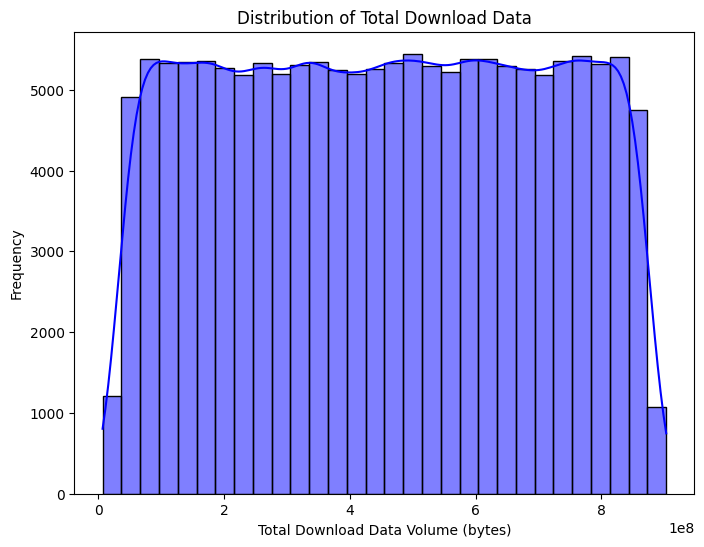

In [92]:
# Explore individual variable distributions.
from visualizer import uni_variate_plot

# Plot univariate distribution of total download data volume
uni_variate_plot(df, 'total dl (bytes)', 'Distribution of Total Download Data', 'Total Download Data Volume (bytes)',
                 'Frequency', 'blue')

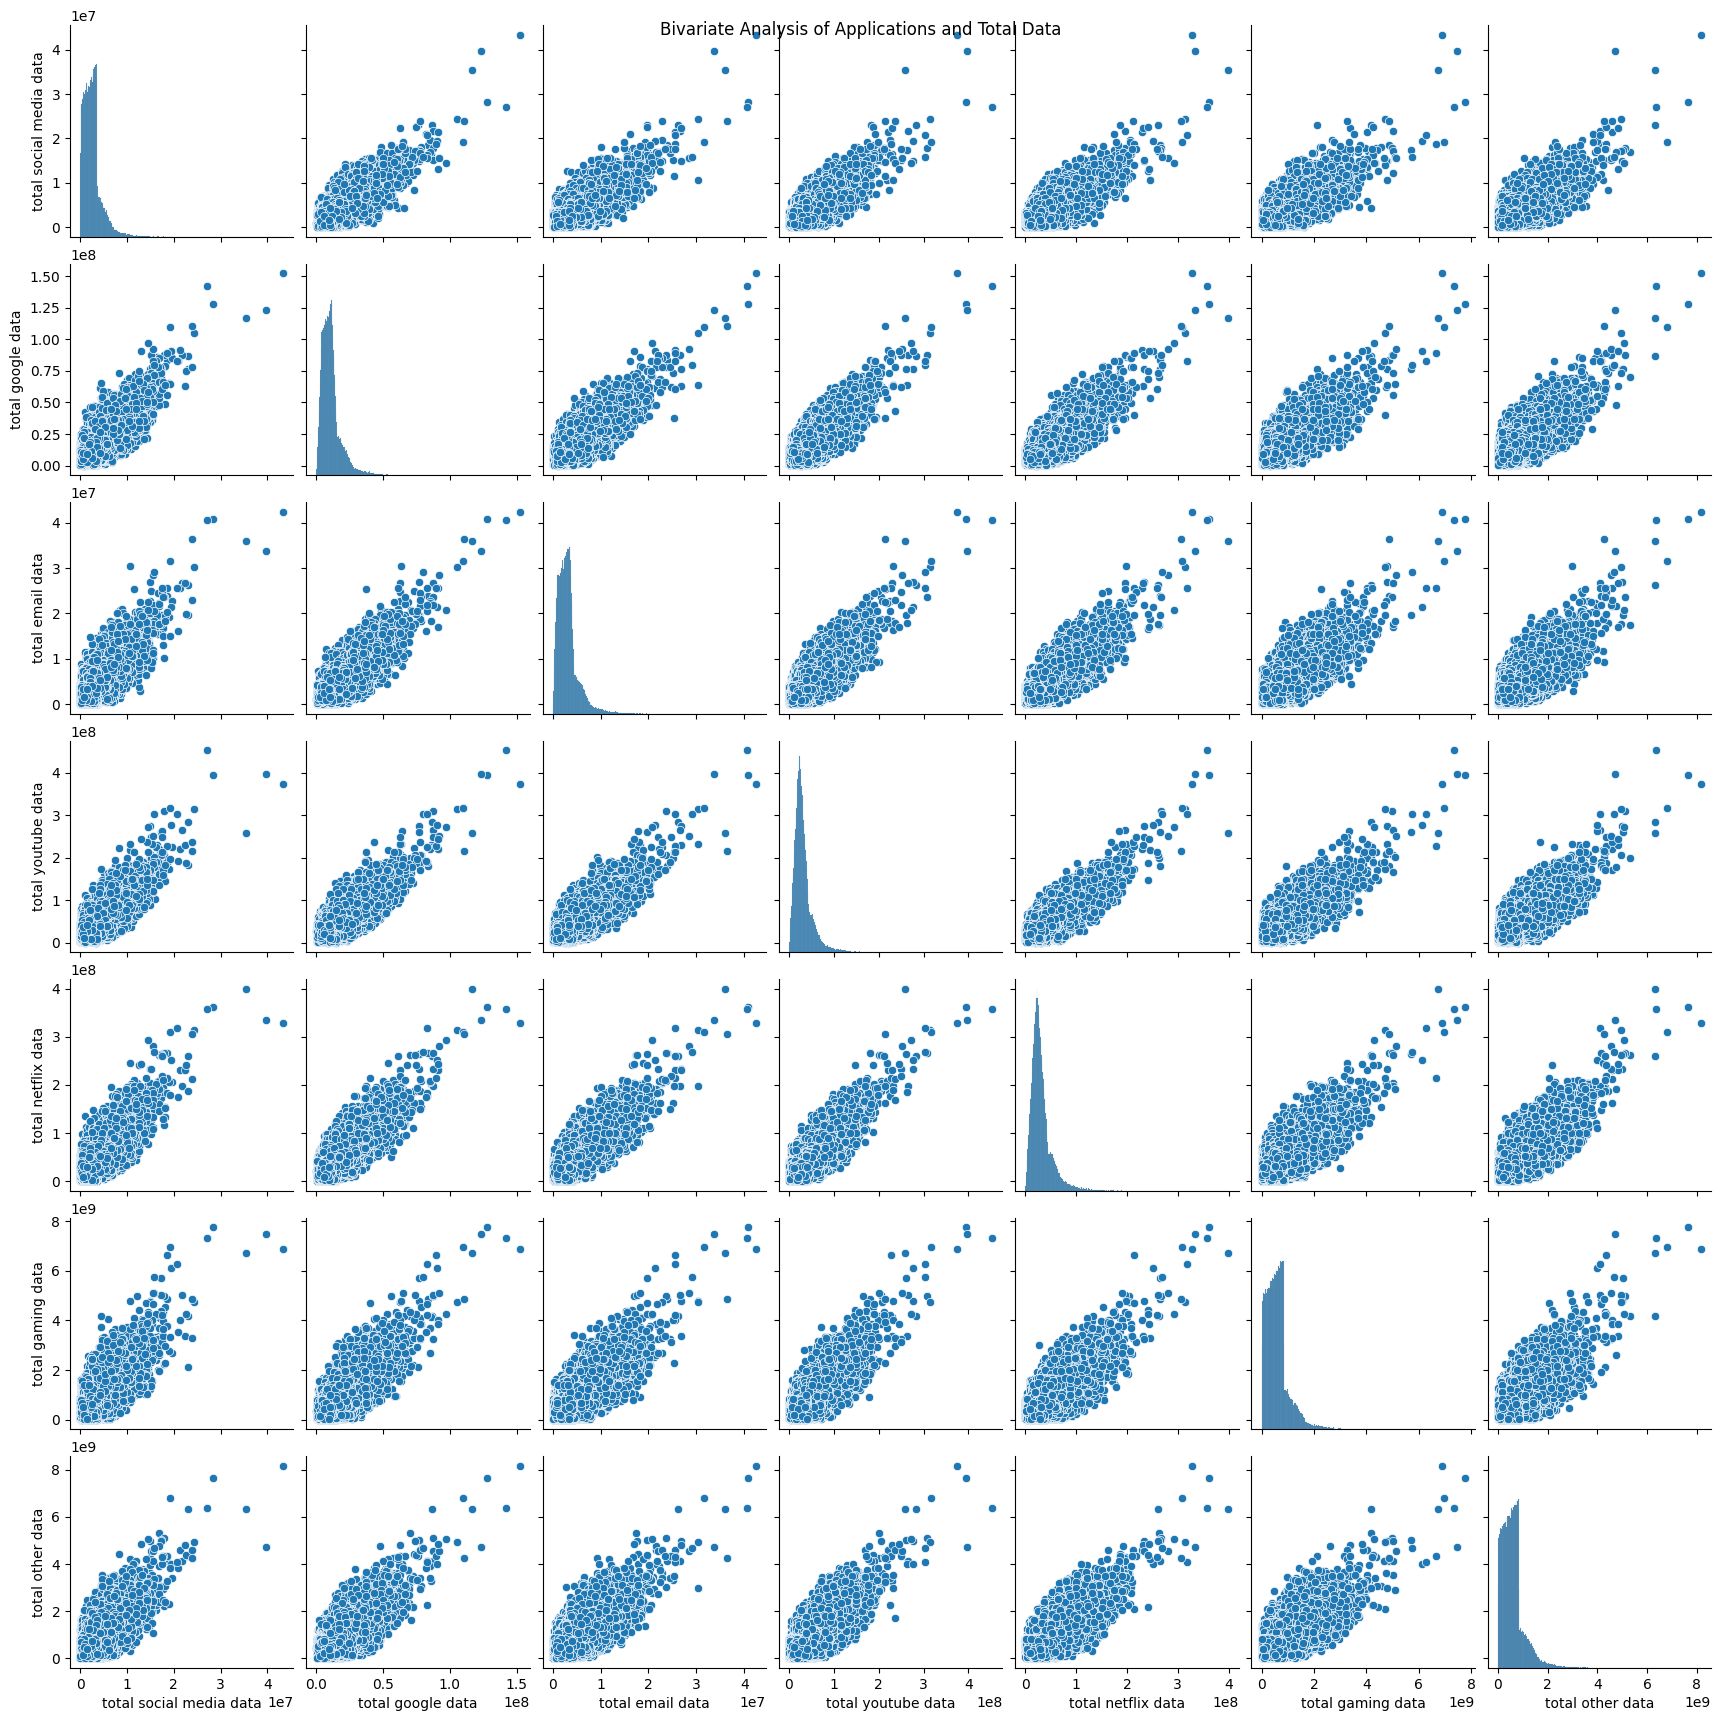

In [93]:
import importlib
import visualizer

# Reload the module to get the updated function
importlib.reload(visualizer)

# Study relationships between variables.
from visualizer import bi_variate_plot2

# List of applications to analyze
applications = ['social media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']

# Call the function
user_aggregates = aggregate_user_data(df)
user_behavior_overview = process_application_totals(user_aggregates, applications)
bi_variate_plot2(user_behavior_overview, applications)

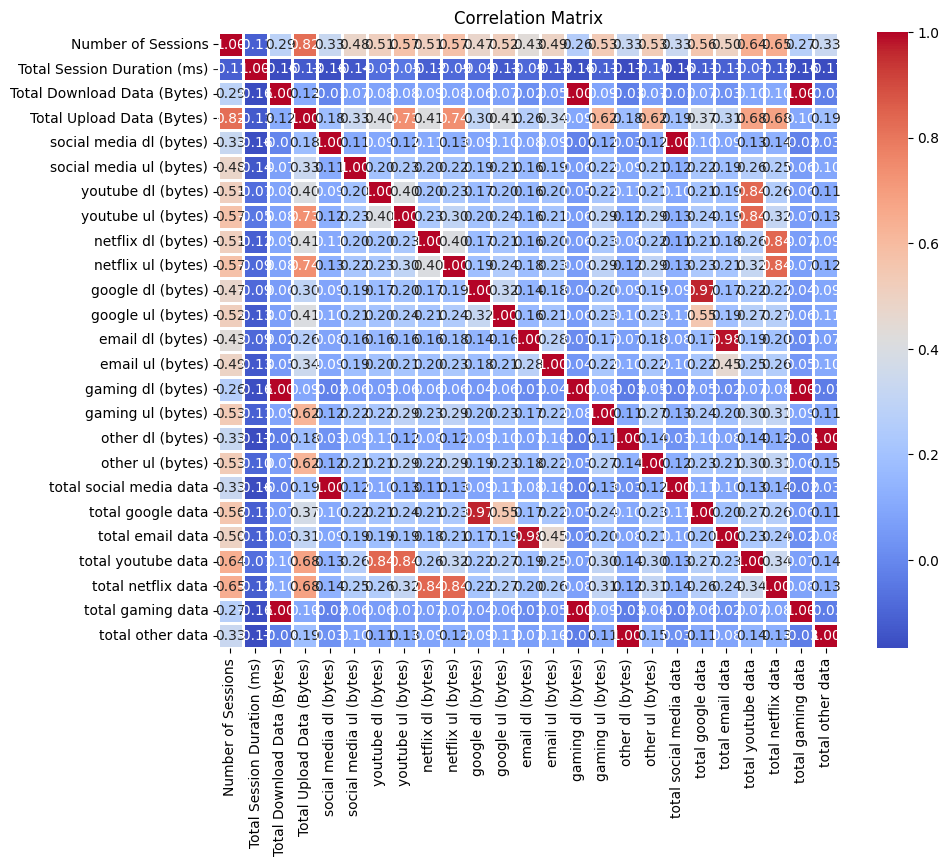

In [94]:
# Examine relationships between multiple variables.

from visualizer import plot_correlation_matrix

# Subset data for correlation
correlation_matrix = user_behavior_overview.corr()

# Plot correlation matrix
plot_correlation_matrix(correlation_matrix)


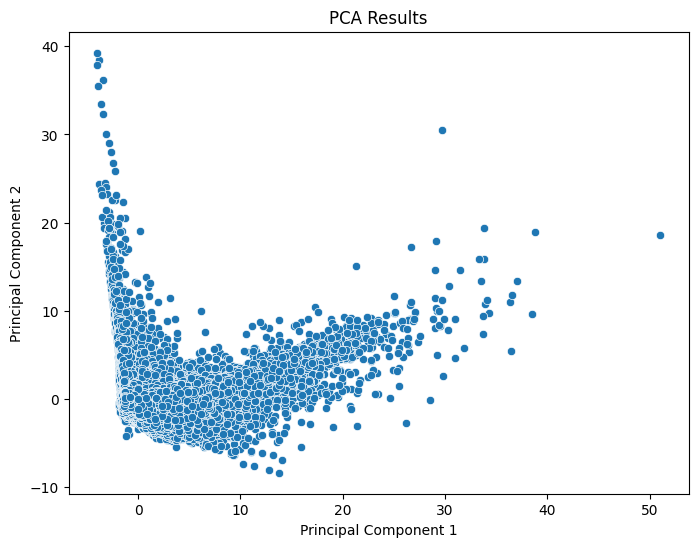

In [95]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data_imputed)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)

# Add PCA results back to DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'])
plt.title("PCA Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



# User Engagement Analysis

Aggregate Engagement Metrics Per Customer

In [96]:
# Aggregate engagement metrics per user
engagement_metrics = df.groupby('msisdn/number').agg({
    'bearer id': 'count',  # Sessions frequency
    'dur. (ms)': 'sum',    # Total session duration
    'total dl (bytes)': 'sum',  # Total download data
    'total ul (bytes)': 'sum'   # Total upload data
}).rename(columns={
    'bearer id': 'Sessions Frequency',
    'dur. (ms)': 'Total Duration (ms)',
    'total dl (bytes)': 'Total Download (Bytes)',
    'total ul (bytes)': 'Total Upload (Bytes)'
})

# Compute total traffic (download + upload)
engagement_metrics['Total Traffic (Bytes)'] = (
    engagement_metrics['Total Download (Bytes)'] + engagement_metrics['Total Upload (Bytes)']
)


In [97]:
# Top 10 customers per engagement metric
for metric in ['Sessions Frequency', 'Total Duration (ms)', 'Total Traffic (Bytes)']:
    print(f"Top 10 Customers by {metric}:")
    print(engagement_metrics.nlargest(10, metric))

Top 10 Customers by Sessions Frequency:
               Sessions Frequency  Total Duration (ms)  \
msisdn/number                                            
3.362632e+10                   18            8791927.0   
3.361489e+10                   17            9966898.0   
3.362578e+10                   17           18553754.0   
3.365973e+10                   16            4035428.0   
3.367588e+10                   15            4865947.0   
3.376054e+10                   15            9279434.0   
3.366716e+10                   13            8744914.0   
3.360313e+10                   12            6287761.0   
3.360452e+10                   12            5207990.0   
3.362708e+10                   12            4703516.0   

               Total Download (Bytes)  Total Upload (Bytes)  \
msisdn/number                                                 
3.362632e+10             7.301517e+09           669650721.0   
3.361489e+10             8.156743e+09           689483001.0   
3.362578e+1

In [98]:
#Normalize Metrics and Run K-Means

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Normalize metrics
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['Sessions Frequency', 'Total Duration (ms)', 'Total Traffic (Bytes)']])

# Run K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)


In [99]:
cluster_analysis = engagement_metrics.groupby('Cluster').agg({
    'Sessions Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})
print("Cluster Analysis:")
print(cluster_analysis)


Cluster Analysis:
        Sessions Frequency                      Total Duration (ms)  \
                       min max      mean    sum                 min   
Cluster                                                               
0                        1   4  2.184791  46228             18235.0   
1                        3  18  4.258194  17020             49323.0   
2                        0   2  1.043550  85258              7142.0   

                                                 Total Traffic (Bytes)  \
                max           mean           sum                   min   
Cluster                                                                  
0         3174824.0  215100.806229  4.551318e+09          2.842182e+08   
1        18553754.0  572159.112084  2.286920e+09          1.085994e+09   
2         1573420.0  107473.680857  8.780600e+09          3.324901e+07   

                                                   
                  max          mean           sum  
Cluste

In [100]:
# Aggregate User Traffic Per Application
applications = ['social media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']
for app in applications:
    dl_column = f"{app} dl (bytes)"
    ul_column = f"{app} ul (bytes)"
    if dl_column in df.columns and ul_column in df.columns:
        df[f'{app}_traffic'] = df[dl_column] + df[ul_column]

# Aggregate total traffic per application per user
app_traffic = df.groupby('msisdn/number')[[f'{app}_traffic' for app in applications]].sum()


In [101]:
#Top 10 Users Per Application
for app in applications:
    if f'{app}_traffic' in app_traffic.columns:
        print(f"Top 10 Users for {app.capitalize()}:")
        print(app_traffic.nlargest(10, f'{app}_traffic')[f'{app}_traffic'])


Top 10 Users for Social media:
msisdn/number
3.362632e+10    43374779.0
3.376054e+10    39783189.0
3.365973e+10    35412358.0
3.361489e+10    28294544.0
3.362578e+10    27135500.0
3.366716e+10    24247850.0
3.378632e+10    23974919.0
3.366907e+10    23800834.0
3.360313e+10    23077825.0
3.365849e+10    23000066.0
Name: social media_traffic, dtype: float64
Top 10 Users for Google:
msisdn/number
3.362632e+10    152191852.0
3.362578e+10    142307915.0
3.361489e+10    127973787.0
3.376054e+10    123223099.0
3.365973e+10    116516345.0
3.378632e+10    110254484.0
3.367588e+10    109860502.0
3.366716e+10    105032696.0
3.376127e+10     97089988.0
3.369876e+10     91935151.0
Name: google_traffic, dtype: float64
Top 10 Users for Email:
msisdn/number
3.362632e+10    42418782.0
3.361489e+10    40788634.0
3.362578e+10    40633966.0
3.378632e+10    36310123.0
3.365973e+10    35999792.0
3.376054e+10    33693767.0
3.367588e+10    31514421.0
3.366546e+10    30417885.0
3.366716e+10    30335796.0
3.369

Top 3 Most Used Applications:
gaming_traffic     6.408892e+13
other_traffic      6.395425e+13
youtube_traffic    3.372204e+12
dtype: float64
Top 3 Most Used Applications:
gaming_traffic     6.408892e+13
other_traffic      6.395425e+13
youtube_traffic    3.372204e+12
dtype: float64


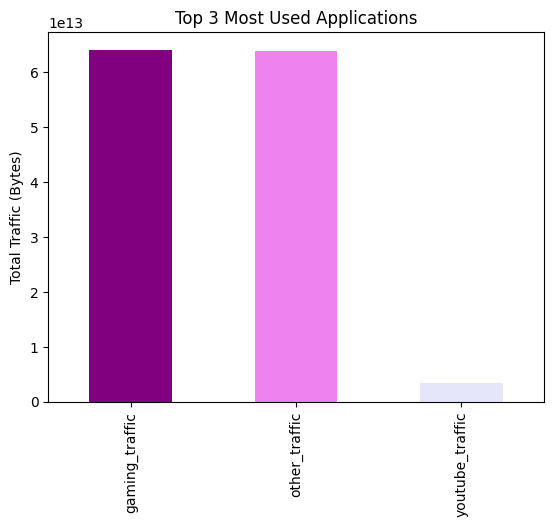

In [102]:
# Plot Top 3 Most Used Applications
total_app_traffic = app_traffic.sum().sort_values(ascending=False).head(3)
print("Top 3 Most Used Applications:")
print(total_app_traffic)

from visualizer import plot_top_applications

plot_top_applications(app_traffic, ['purple', 'violet', 'lavender'], top_n=3)


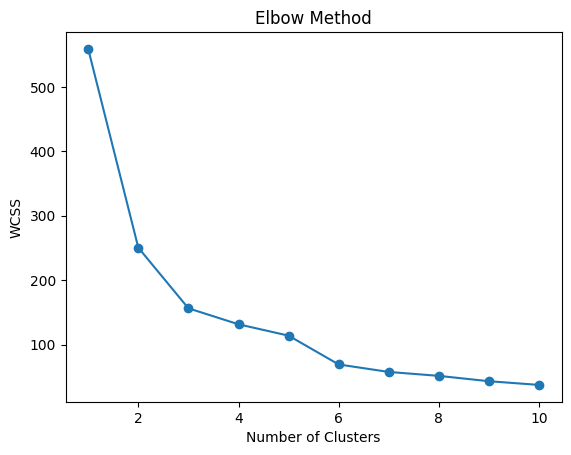

In [103]:
# Optimize k for Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_metrics)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# Experience Analytics

In [104]:
# Aggregate metrics per customer
experience_metrics = df.groupby('msisdn/number').agg({
    'tcp dl retrans. vol (bytes)': 'mean',
    'tcp ul retrans. vol (bytes)': 'mean',
    'avg rtt dl (ms)': 'mean',
    'avg rtt ul (ms)': 'mean',
    'avg bearer tp dl (kbps)': 'mean',
    'avg bearer tp ul (kbps)': 'mean',
    'handset type': lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown'
}).rename(columns={
    'tcp dl retrans. vol (bytes)': 'Avg TCP DL Retransmission',
    'tcp ul retrans. vol (bytes)': 'Avg TCP UL Retransmission',
    'avg rtt dl (ms)': 'Avg RTT DL (ms)',
    'avg rtt ul (ms)': 'Avg RTT UL (ms)',
    'avg bearer tp dl (kbps)': 'Avg Throughput DL (kbps)',
    'avg bearer tp ul (kbps)': 'Avg Throughput UL (kbps)',
    'handset type': 'Handset Type'
})

# Compute combined metrics
experience_metrics['Avg TCP Retransmission'] = (
    experience_metrics['Avg TCP DL Retransmission'] + experience_metrics['Avg TCP UL Retransmission']
) / 2
experience_metrics['Avg RTT (ms)'] = (
    experience_metrics['Avg RTT DL (ms)'] + experience_metrics['Avg RTT UL (ms)']
) / 2
experience_metrics['Avg Throughput (kbps)'] = (
    experience_metrics['Avg Throughput DL (kbps)'] + experience_metrics['Avg Throughput UL (kbps)']
) / 2

# Drop intermediate columns
experience_metrics = experience_metrics.drop([
    'Avg TCP DL Retransmission', 'Avg TCP UL Retransmission',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Throughput DL (kbps)', 'Avg Throughput UL (kbps)'
], axis=1)

print("Experience Metrics Per Customer:")
print(experience_metrics.head())


Experience Metrics Per Customer:
                                 Handset Type  Avg TCP Retransmission  \
msisdn/number                                                           
3.360100e+10   Huawei P20 Lite Huawei Nova 3E                     NaN   
3.360100e+10           Apple iPhone 7 (A1778)                     NaN   
3.360100e+10                        undefined                     NaN   
3.360101e+10          Apple iPhone 5S (A1457)                     NaN   
3.360101e+10          Apple iPhone Se (A1723)               4685416.0   

               Avg RTT (ms)  Avg Throughput (kbps)  
msisdn/number                                       
3.360100e+10          23.00                   38.0  
3.360100e+10          15.50                   49.5  
3.360100e+10            NaN                   48.5  
3.360101e+10          42.00                  124.0  
3.360101e+10          29.75                14211.0  


In [106]:
# Compute Top, Bottom, and Most Frequent Values
metrics = ['Avg TCP Retransmission', 'Avg RTT (ms)', 'Avg Throughput (kbps)']

for metric in metrics:
    print(f"Top 10 {metric}:")
    print(experience_metrics.nlargest(10, metric)[metric])
    
    print(f"Bottom 10 {metric}:")
    print(experience_metrics.nsmallest(10, metric)[metric])
    
    print(f"Most Frequent {metric}:")
    print(experience_metrics[metric].value_counts().head(10))


Top 10 Avg TCP Retransmission:
msisdn/number
3.369858e+10    2.150739e+09
3.365871e+10    2.144060e+09
3.366491e+10    2.134324e+09
3.365863e+10    2.127330e+09
3.366613e+10    2.105629e+09
3.366877e+10    2.083297e+09
3.366131e+10    2.068969e+09
3.366240e+10    2.058902e+09
3.366682e+10    1.984060e+09
3.376264e+10    1.893435e+09
Name: Avg TCP Retransmission, dtype: float64
Bottom 10 Avg TCP Retransmission:
msisdn/number
3.365013e+10    48.5
3.365940e+10    54.0
3.364108e+10    56.5
3.361478e+10    64.0
3.376206e+10    64.5
3.362636e+10    67.0
3.376826e+10    67.0
3.360783e+10    71.5
3.365177e+10    87.5
3.365068e+10    88.0
Name: Avg TCP Retransmission, dtype: float64
Most Frequent Avg TCP Retransmission:
Avg TCP Retransmission
1330.0    21
2660.0    20
3325.0    18
1995.0    15
3990.0    12
1324.0     8
5985.0     8
936.5      7
5320.0     7
4655.0     6
Name: count, dtype: int64
Top 10 Avg RTT (ms):
msisdn/number
3.366232e+10    48462.00
3.368369e+10    27424.00
3.366087e+10   

Average Throughput Per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                             11755.000000
A-Link Telecom I. Cubot Note Plus                                                       3349.500000
A-Link Telecom I. Cubot Note S                                                          4468.500000
A-Link Telecom I. Cubot Nova                                                           28108.500000
A-Link Telecom I. Cubot Power                                                          34734.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       29.000000
Zyxel Communicat. Lte7460                                                              30978.000000
Zyxel Communicat. Sbg3600                                                              48675.500000
Zyxel Communicat. Zyxel Wah7706                   

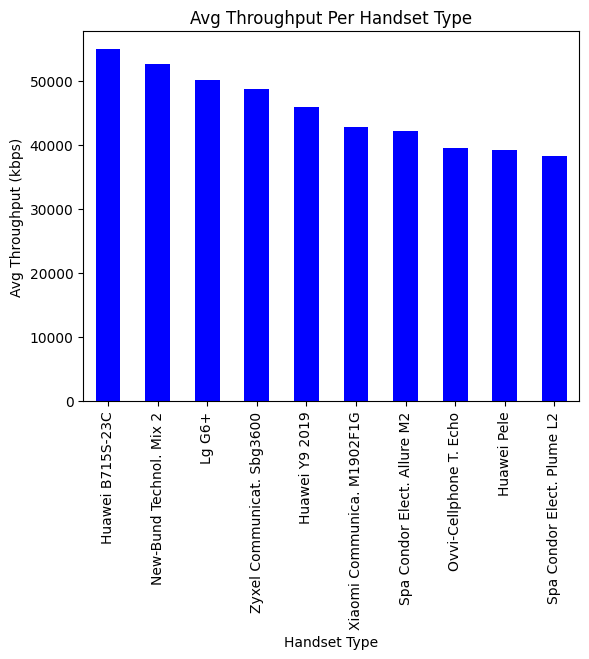

In [107]:
# Average Throughput Per Handset Type
throughput_distribution = experience_metrics.groupby('Handset Type')['Avg Throughput (kbps)'].mean()
print("Average Throughput Per Handset Type:")
print(throughput_distribution)

# Visualization
throughput_distribution.sort_values(ascending=False).head(10).plot(kind='bar', title='Avg Throughput Per Handset Type', color='blue')
plt.ylabel('Avg Throughput (kbps)')
plt.show()


Average TCP Retransmission Per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                                      NaN
A-Link Telecom I. Cubot Note Plus                                                      3.081065e+05
A-Link Telecom I. Cubot Note S                                                         2.070587e+07
A-Link Telecom I. Cubot Nova                                                           6.858500e+04
A-Link Telecom I. Cubot Power                                                          4.020500e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809             NaN
Zyxel Communicat. Lte7460                                                              2.063827e+07
Zyxel Communicat. Sbg3600                                                              2.674347e+07
Zyxel Communicat. Zyxel Wah7706           

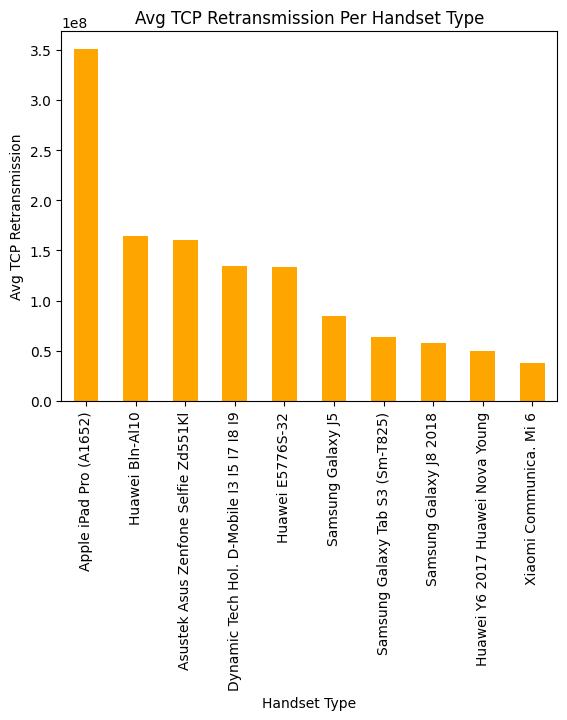

In [108]:
# Average TCP Retransmission Per Handset Type
tcp_retransmission_distribution = experience_metrics.groupby('Handset Type')['Avg TCP Retransmission'].mean()
print("Average TCP Retransmission Per Handset Type:")
print(tcp_retransmission_distribution)

# Visualization
tcp_retransmission_distribution.sort_values(ascending=False).head(10).plot(kind='bar', title='Avg TCP Retransmission Per Handset Type', color='orange')
plt.ylabel('Avg TCP Retransmission')
plt.show()


In [110]:
# K-Means Clustering for Experience Segmentation
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(experience_metrics[['Avg TCP Retransmission', 'Avg RTT (ms)', 'Avg Throughput (kbps)']])

# Normalize metrics
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(imputed_data)

# Run K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
experience_metrics['Experience Cluster'] = kmeans.fit_predict(normalized_data)

print("Cluster Assignments:")
print(experience_metrics['Experience Cluster'].value_counts())


Cluster Assignments:
Experience Cluster
1    79679
2    21315
0     5862
Name: count, dtype: int64


In [111]:
# Interpret Cluster Characteristics
cluster_analysis = experience_metrics.groupby('Experience Cluster').agg({
    'Avg TCP Retransmission': ['min', 'max', 'mean'],
    'Avg RTT (ms)': ['min', 'max', 'mean'],
    'Avg Throughput (kbps)': ['min', 'max', 'mean']
})
print("Cluster Analysis:")
print(cluster_analysis)

Cluster Analysis:
                   Avg TCP Retransmission                              \
                                      min           max          mean   
Experience Cluster                                                      
0                                  137.25  2.144060e+09  3.978407e+07   
1                                   54.00  9.551905e+08  2.511612e+06   
2                                   48.50  2.150739e+09  8.374090e+06   

                   Avg RTT (ms)                      Avg Throughput (kbps)  \
                            min       max       mean                   min   
Experience Cluster                                                           
0                         10.50   1477.50  47.287539              19659.50   
1                          0.00  48462.00  73.833489                  0.00   
2                          8.75   4148.25  55.615600               9188.75   

                                             
                          ma

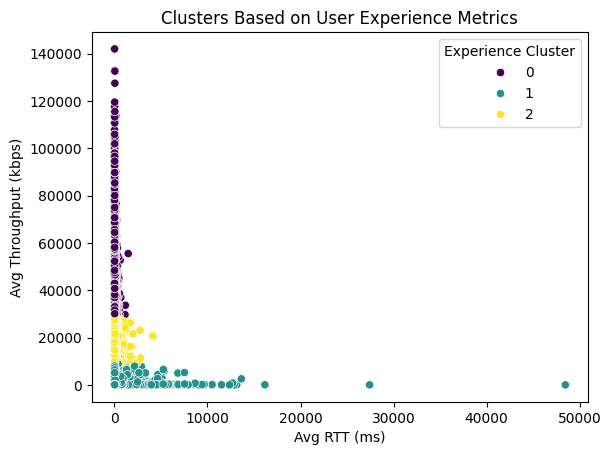

In [112]:
import seaborn as sns

sns.scatterplot(
    x=experience_metrics['Avg RTT (ms)'], 
    y=experience_metrics['Avg Throughput (kbps)'], 
    hue=experience_metrics['Experience Cluster'], 
    palette='viridis'
)
plt.title('Clusters Based on User Experience Metrics')
plt.xlabel('Avg RTT (ms)')
plt.ylabel('Avg Throughput (kbps)')
plt.show()
